In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
import gc
import lightgbm as lgb
import keras.backend as K
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_para = pd.read_pickle('../input/param_errors.pkl')
df_non = pd.read_pickle('../input/non_param_errors.pkl')
target = pd.read_pickle('../input/target.pkl')
df = pd.concat([df_para, df_non[['lgb_price', 'nn_price']]], axis=1)

Using TensorFlow backend.


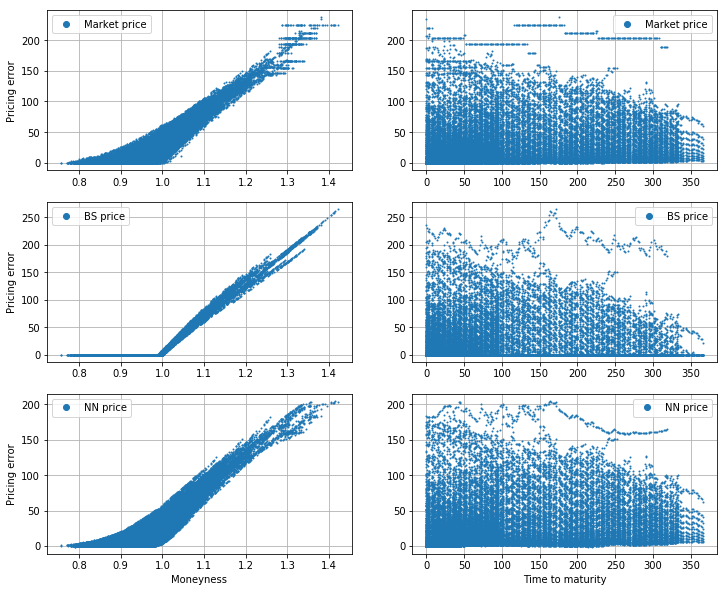

In [2]:
fig = plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.ylabel('Pricing error')
plt.grid(True)
fig = plt.plot(df['moneyness'], df['market_price'], linestyle='', marker='o', markersize=1)
plt.legend(['Market price'], markerscale=6)

plt.subplot(3, 2, 3)
plt.ylabel('Pricing error')
plt.grid(True)
fig = plt.plot(df['moneyness'], df['bs_price'], linestyle='', marker='o', markersize=1)
plt.legend(['BS price'], markerscale=6)

plt.subplot(3, 2, 5)
plt.ylabel('Pricing error')
plt.grid(True)
fig = plt.plot(df['moneyness'], df['nn_price'], linestyle='', marker='o', markersize=1)
plt.legend(['NN price'], markerscale=6)
plt.xlabel('Moneyness')


plt.subplot(3, 2, 2)
plt.grid(True)
fig = plt.plot(df['TTM'], df['market_price'], linestyle='', marker='o', markersize=1)
plt.legend(['Market price'], markerscale=6)


plt.subplot(3, 2, 4)
plt.grid(True)
fig = plt.plot(df['TTM'], df['bs_price'], linestyle='', marker='o', markersize=1)
plt.legend(['BS price'], markerscale=6)


plt.subplot(3, 2, 6)
plt.grid(True)
fig = plt.plot(df['TTM'], df['nn_price'], linestyle='', marker='o', markersize=1)
plt.legend(['NN price'], markerscale=6)
plt.xlabel('Time to maturity')

plt.savefig("nn_vs_bs_price.pdf", bbox_inches='tight')

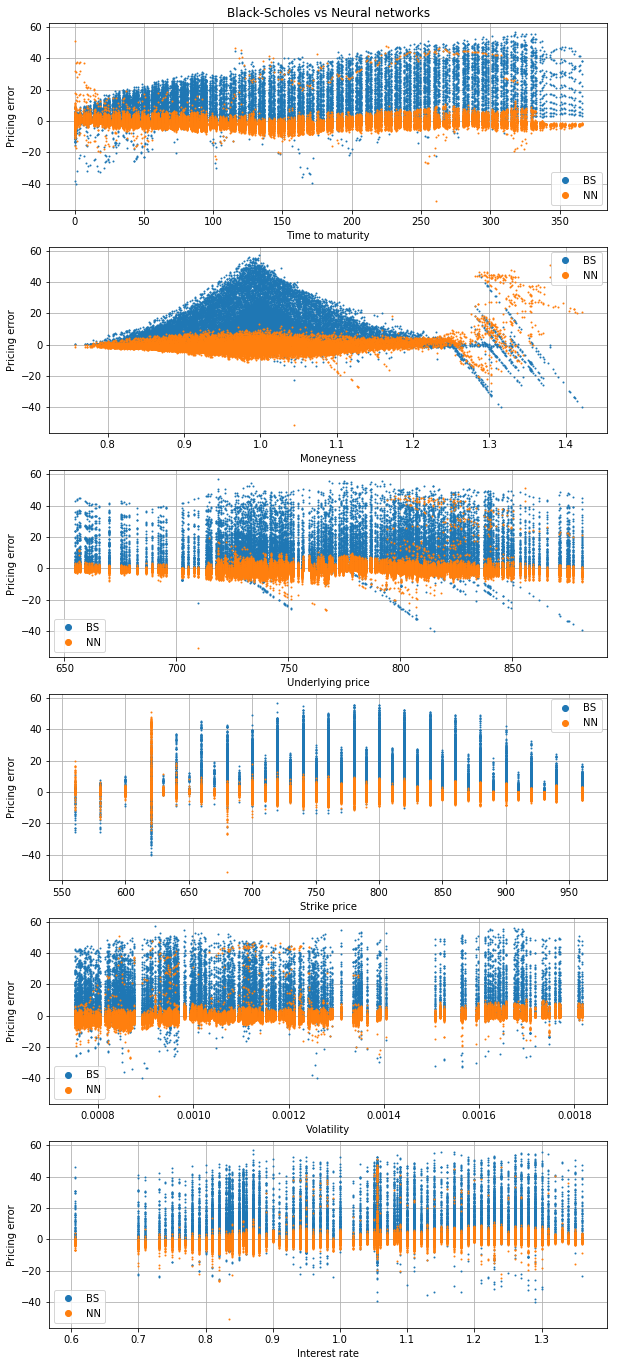

In [3]:
fig = plt.figure(figsize=(10, 24))

plt.subplot(6, 1, 1)
plt.title("Black-Scholes vs Neural networks")
plt.ylabel('Pricing error')
plt.grid(True)
fig = plt.plot(df['TTM'], df['market_price'] - df['bs_price'], linestyle='', marker='o', markersize=1)
fig = plt.plot(df['TTM'], df['market_price'] - df['nn_price'], linestyle='', marker='o', markersize=1)
plt.xlabel('Time to maturity')
plt.legend(['BS', 'NN'], markerscale=6)

plt.subplot(6, 1, 2)
plt.ylabel('Pricing error')
plt.grid(True)
fig = plt.plot(df['moneyness'], df['market_price'] - df['bs_price'], linestyle='', marker='o', markersize=1)
fig = plt.plot(df['moneyness'], df['market_price'] - df['nn_price'], linestyle='', marker='o', markersize=1)
plt.xlabel('Moneyness')
plt.legend(['BS', 'NN'], markerscale=6)

plt.subplot(6, 1, 3)
plt.ylabel('Pricing error')
plt.grid(True)
fig = plt.plot(df['obx_price'], df['market_price'] - df['bs_price'], linestyle='', marker='o', markersize=1)
fig = plt.plot(df['obx_price'], df['market_price'] - df['nn_price'], linestyle='', marker='o', markersize=1)
plt.xlabel('Underlying price')
plt.legend(['BS', 'NN'], markerscale=6)

plt.subplot(6, 1, 4)
plt.ylabel('Pricing error')
plt.grid(True)
fig = plt.plot(df['strike'], df['market_price'] - df['bs_price'], linestyle='', marker='o', markersize=1)
fig = plt.plot(df['strike'], df['market_price'] - df['nn_price'], linestyle='', marker='o', markersize=1)
plt.xlabel('Strike price')
plt.legend(['BS', 'NN'], markerscale=6)

plt.subplot(6, 1, 5)
plt.ylabel('Pricing error')
plt.grid(True)
fig = plt.plot(df['obx_60D_vol'], df['market_price'] - df['bs_price'], linestyle='', marker='o', markersize=1)
fig = plt.plot(df['obx_60D_vol'], df['market_price'] - df['nn_price'], linestyle='', marker='o', markersize=1)
plt.xlabel('Volatility')
plt.legend(['BS', 'NN'], markerscale=6)

plt.subplot(6, 1, 6)
plt.ylabel('Pricing error')
plt.grid(True)
fig = plt.plot(df['ir_3m_mid'], df['market_price'] - df['bs_price'], linestyle='', marker='o', markersize=1)
fig = plt.plot(df['ir_3m_mid'], df['market_price'] - df['nn_price'], linestyle='', marker='o', markersize=1)
plt.xlabel('Interest rate')
plt.legend(['BS', 'NN'], markerscale=6)

plt.savefig("nn_vs_bs_error.pdf", bbox_inches='tight')